In [1]:
#implement principal component analysis on any data set
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def PCA(X, num_components):
    #Step - 1
    X_meaned = X - np.mean(X, axis = 0)
    
    #step - 2
    cov_mat = np.cov(X_meaned, rowvar = False)
    
    #step - 3;
    eigen_values, eigen_vector = np.linalg.eigh(cov_mat)
    
    #step - 4
    sorted_index = np.argsort(eigen_values)[::-1]
    sort_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vector[:, sorted_index]
    
    #step - 5
    eigenvector_subset  = sorted_eigenvectors[:, 0:num_components]
    
    #step - 6;
    X_reduced = np.dot(eigenvector_subset.transpose(), X_meaned.transpose()). transpose()
    
    return X_reduced

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

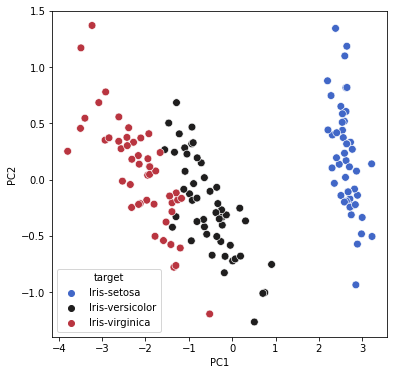

In [4]:
#Get the IRIS dataset
#url  = "iris.data"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data";
data  = pd.read_csv(url, names =['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

#prepare the data 
x = data.iloc[:,0:4]

#prepare the target
target = data.iloc[:,4]

#Applying it to PCA function
mat_reduced = PCA(x,2)

#creating a panads Dataframe of reduced dataset
principal_df = pd.DataFrame(mat_reduced, columns = ['PC1', 'PC2'])

#concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df, pd.DataFrame(target)], axis = 1)

plt.figure(figsize = (6,6))
sns.scatterplot(data = principal_df, x = 'PC1', y = 'PC2', hue = 'target', s = 60, palette = 'icefire')